In [1]:
#!pip install pmdarima

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew
import statsmodels.api as sm

In [2]:
api_key = '579b464db66ec23bdd000001023b005613b940c9705454ff030f9881'
url = 'https://api.data.gov.in/resource/07d49df4-233f-4898-92db-e6855d4dd94c?api-key=579b464db66ec23bdd000001023b005613b940c9705454ff030f9881&format=json&limit=70'

response = requests.get(url).json()

In [3]:
response

{'created': 1496921004,
 'updated': 1543520100,
 'title': 'GDP of India and major Sectors of Economy, Share of each sector to GDP and Growth rate of GDP and other sectors of economy 1951-52 onward',
 'source': 'data.gov.in',
 'org_type': 'Central',
 'org': ['NITI Aayog'],
 'sector': ['Macro Economy', 'Economy'],
 'visualizable': '1',
 'index_name': '07d49df4-233f-4898-92db-e6855d4dd94c',
 'catalog_uuid': '9e964439-fb05-446c-9903-a6bf14899f26',
 'status': 'ok',
 'field': [{'id': 'financial_year',
   'name': 'Financial Year',
   'type': 'keyword'},
  {'id': 'gross_domestic_product_in_rs_cr_at_2004_05_prices',
   'name': 'Gross Domestic Product (in Rs. Cr) at 2004-05 Prices',
   'type': 'double'},
  {'id': 'agriculture_allied_services_in_rs_cr_at_2004_05_prices',
   'name': 'Agriculture & Allied Services (in Rs. Cr.) at 2004-05 Prices',
   'type': 'double'},
  {'id': 'agriculture_in_rs_cr_at_2004_05_prices',
   'name': 'Agriculture (in Rs. Cr.) at 2004-05 Prices',
   'type': 'double'},
  

In [4]:
len(response['records']) #[0]['financial_year']

62

In [5]:
Financial_year = response['records'][0]['financial_year']
print(Financial_year)

GDP_in_rs_cr = response['records'][0]['gross_domestic_product_in_rs_cr_at_2004_05_prices']
print(GDP_in_rs_cr)

GDP_growth_rate_yoy = response['records'][0]['gross_domestic_product___growth_rate_yoy_']
print(GDP_growth_rate_yoy)

1951-52
286147
233


In [6]:
gdp_sample_df = pd.DataFrame(columns=['Financial_year', 'GDP_in_rs_cr', 'GDP_growth_rate_yoy'])

In [7]:
for data in response['records']:
    Financial_year = data['financial_year']
    GDP_in_rs_cr = data['gross_domestic_product_in_rs_cr_at_2004_05_prices']
    GDP_growth_rate_yoy = data['gross_domestic_product___growth_rate_yoy_']
    
    print(Financial_year)
    print(GDP_in_rs_cr)
    print(GDP_growth_rate_yoy)
    
    
    gdp_sample_df = gdp_sample_df.append({'Financial_year':Financial_year, 'GDP_in_rs_cr':GDP_in_rs_cr, 
                                          'GDP_growth_rate_yoy':GDP_growth_rate_yoy}, ignore_index=True)

1951-52
286147
233
1952-53
294267
284
1953-54
312177
609
1954-55
325431
425
1955-56
333766
256
1956-57
352766
569
1957-58
348500
-121
1958-59
374948
759
1959-60
383153
219
1960-61
410279
708
1961-62
423011
310
1962-63
431960
212
1963-64
453829
506
1964-65
488247
758
1965-66
470402
-365
1966-67
475190
102
1967-68
513860
814
1968-69
527270
261
1969-70
561630
652
1970-71
589787
501
1971-72
595741
101
1972-73
593843
-32
1973-74
620872
455
1974-75
628079
116
1975-76
684634
900
1976-77
693191
125
1977-78
744972
747
1978-79
785965
550
1979-80
745083
-520
1980-81
798506
717
1981-82
843426
563
1982-83
868092
292
1983-84
936270
785
1984-85
973357
396
1985-86
1013866
416
1986-87
1057612
431
1987-88
1094993
353
1988-89
1206243
1016
1989-90
1280228
613
1990-91
1347889
529
1991-92
1367171
143
1992-93
1440504
536
1993-94
1522344
568
1994-95
1619694
639
1995-96
1737741
729
1996-97
1876319
797
1997-98
1957032
430
1998-99
2087828
668
1999-2K
2246276
759
2000-01
2342774
430
2001-02
2472052
552
2002-03
25

In [8]:
gdp_sample_df.head(10)

,Financial_year,GDP_in_rs_cr,GDP_growth_rate_yoy
0,1951-52,286147,233
1,1952-53,294267,284
2,1953-54,312177,609
3,1954-55,325431,425
4,1955-56,333766,256
5,1956-57,352766,569
6,1957-58,348500,-121
7,1958-59,374948,759
8,1959-60,383153,219
9,1960-61,410279,708


In [9]:
gdp_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Financial_year       62 non-null     object
 1   GDP_in_rs_cr         62 non-null     object
 2   GDP_growth_rate_yoy  62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [10]:
gdp_sample_df['GDP_growth_rate_yoy'] = gdp_sample_df['GDP_growth_rate_yoy'].astype('int64')

In [11]:
# got error in this block's last line of code due to my financial year didnt properly got converted into proper date time 
# format because it has both years (invalid format) i.e. 1952-53 so this date came as NaT (Not a Date)

# so to solve this we will again convert our finacial year into object, strip the next year part i.e. -53 and keep the first
# part i.e. 1952

#gdp_sample_df['Financial_year'] = pd.to_datetime(gdp_sample_df['Financial_year'], errors='coerce')

In [12]:
#gdp_sample_df.set_index('Financial_year')

In [13]:
# gdp_sample_df['Financial_year'] = gdp_sample_df['Financial_year'].astype(object)

In [14]:
gdp_sample_df['Financial_year'] = gdp_sample_df['Financial_year'].apply(lambda x: str(x).split('-')[0])
gdp_sample_df['Financial_year']

0     1951
1     1952
2     1953
3     1954
4     1955
      ... 
57    2008
58    2009
59    2010
60    2011
61    2012
Name: Financial_year, Length: 62, dtype: object

In [15]:
gdp_sample_df

,Financial_year,GDP_in_rs_cr,GDP_growth_rate_yoy
0,1951,286147,233
1,1952,294267,284
2,1953,312177,609
3,1954,325431,425
4,1955,333766,256
...,...,...,...
57,2008,4158676,672
58,2009,4516071,859
59,2010,4937006,932
60,2011,5243582,621


In [16]:
gdp_sample_df['Financial_year'] = pd.to_datetime(gdp_sample_df['Financial_year'])
gdp_sample_df['Financial_year']

0    1951-01-01
1    1952-01-01
2    1953-01-01
3    1954-01-01
4    1955-01-01
        ...    
57   2008-01-01
58   2009-01-01
59   2010-01-01
60   2011-01-01
61   2012-01-01
Name: Financial_year, Length: 62, dtype: datetime64[ns]

In [17]:
gdp_sample_df['GDP_in_rs_cr'] = gdp_sample_df['GDP_in_rs_cr'].astype('float64')
gdp_sample_df['GDP_in_rs_cr']

0      286147.0
1      294267.0
2      312177.0
3      325431.0
4      333766.0
        ...    
57    4158676.0
58    4516071.0
59    4937006.0
60    5243582.0
61    5503476.0
Name: GDP_in_rs_cr, Length: 62, dtype: float64

In [18]:
# we dont need year over year column as it heavily corelates with direct gdp value so we drop that

gdp_sample_df = gdp_sample_df.drop(columns=['GDP_growth_rate_yoy'])
gdp_sample_df

,Financial_year,GDP_in_rs_cr
0,1951-01-01,286147.0
1,1952-01-01,294267.0
2,1953-01-01,312177.0
3,1954-01-01,325431.0
4,1955-01-01,333766.0
...,...,...
57,2008-01-01,4158676.0
58,2009-01-01,4516071.0
59,2010-01-01,4937006.0
60,2011-01-01,5243582.0


In [19]:
gdp_sample_df1 = gdp_sample_df.set_index('Financial_year')

In [20]:
gdp_sample_df1

,GDP_in_rs_cr
Financial_year,
1951-01-01,286147.0
1952-01-01,294267.0
1953-01-01,312177.0
1954-01-01,325431.0
1955-01-01,333766.0
...,...
2008-01-01,4158676.0
2009-01-01,4516071.0
2010-01-01,4937006.0


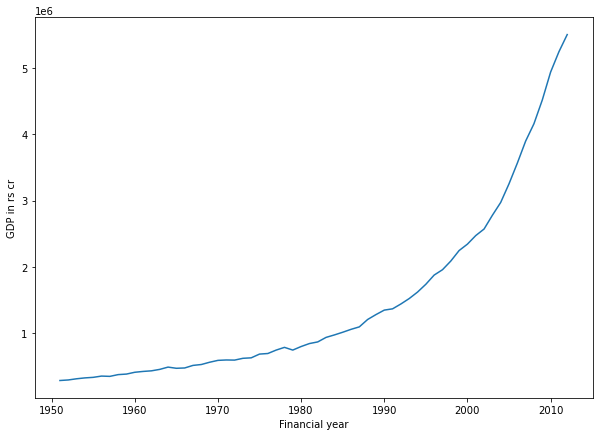

In [22]:
plt.figure(figsize=(10,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Financial year')
ax1.set_ylabel('GDP in rs cr')
ax1.plot(gdp_sample_df1)

In [23]:
# testing for stationarity

from statsmodels.tsa.stattools import adfuller

In [24]:
# # this is my assumption

# # H0 - Null hypothesis: It is stationary, non seasonal
# # H1 - Alternate hypothesis: It is non-stationary, seasonal

# def adfuller_test1(x):
#     result = adfuller(x)
#     labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
#     for value,label in zip(result,labels):
#         print(label+' : '+str(value))
#     if result[1] <=0.05:
#         print('strong evidence against null hypothesis, we will reject null hypothesis and our data is non stationary')
#     else:
#         print('due to weak evidence or lack of evidence against null hypothesis, we fail to reject null hypothesis indicating it is staionary')

        
# so my assumption is wrong you should indeed consider H0 as non stationary every time and if p-value <= 0.05 then reject 
# H0 indicating it is stationary otherwise if its greater then fail to reject H0 indicating it is non-stationary

In [25]:
# adfuller_test1(gdp_sample_df['GDP_in_rs_cr'])

## To check whether data is stationary or not

### Augmented Dicky Fuller test

In [26]:
# this test uses statistical terms such as p-value to compute stationarity

# H0: It is non-stationary, seasonal
# H1: It is stationary, non seasonal

def adfuller_test2(x):
    result = adfuller(x)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <=0.05:
        print('strong evidence against null hypothesis, we will reject null hypothesis indicating it is stationary')
    else:
        print('due to weak evidence or lack of evidence against null hypothesis, we fail to reject null hypothesis indicating it is non-staionary')

In [27]:
adfuller_test2(gdp_sample_df1['GDP_in_rs_cr'])

ADF Test Statistic : 1.5552297745511696
p-value : 0.9977168474627248
#Lags Used : 11
Number of Observations Used : 50
due to weak evidence or lack of evidence against null hypothesis, we fail to reject null hypothesis indicating it is non-staionary


### Rolling Statistics

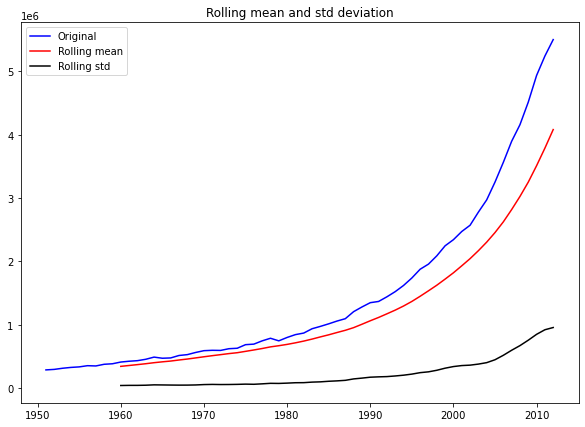

In [28]:
# this test uses graph, mean, standard deviation to compute stationarity

# here below our rolling mean line is following the trend(not constant) but rolling stddev line is somewhat constant, for 
# stationary both lines should be constant, so we can say our data is non-stationary

rollmean = gdp_sample_df1.rolling(10).mean()
rollstd = gdp_sample_df1.rolling(10).std()

plt.figure(figsize=(10,7))
fig = plt.figure(1)

# plot rolling statistics
original = plt.plot(gdp_sample_df1, color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling mean')
std = plt.plot(rollstd, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and std deviation')
plt.show(block=False)

### Now below is a state of trial and error done by me to find the differencing value manually before I got to know about "from pmdarima.arima.utils import ndiffs", experimenting with auto_arima

### This was done only for my understanding and what all mistakes I made so not to repeat

### So if you want main code and dont want to see messy code see from onwards Proper method below from code block 65

array([[<AxesSubplot:title={'center':'GDP_in_rs_cr'}>]], dtype=object)

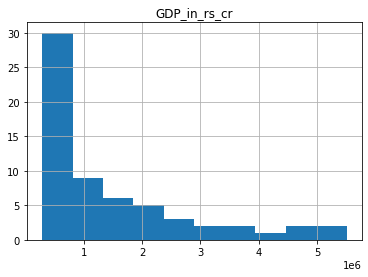

In [31]:
gdp_sample_df1.hist()

,GDP_in_rs_cr
Financial_year,
1951-01-01,12.564261
1952-01-01,12.592243
1953-01-01,12.651326
1954-01-01,12.692906
1955-01-01,12.718195
...,...
2008-01-01,15.240707
2009-01-01,15.323153
2010-01-01,15.412270


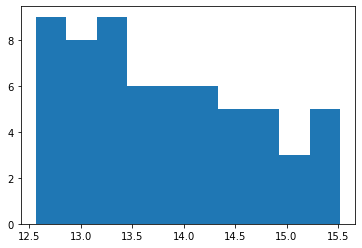

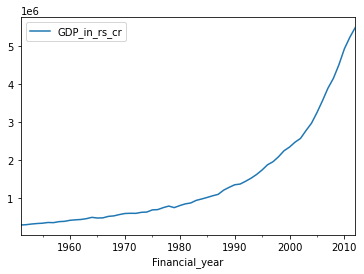

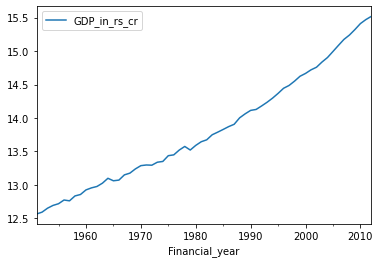

In [33]:
X_log = np.log(gdp_sample_df1)
plt.hist(X_log)
skew(X_log)
gdp_sample_df1.plot()
X_log.plot()
X_log

## Lets make data stationary

In [34]:
gdp_sample_df1['gdp recursive order2 difference'] = np.append([np.nan] * 2, np.diff(gdp_sample_df1['GDP_in_rs_cr'], n=2))
gdp_sample_df1.head(10)

,GDP_in_rs_cr,gdp recursive order2 difference
Financial_year,,
1951-01-01,286147.0,NaN
1952-01-01,294267.0,NaN
1953-01-01,312177.0,9790.0
1954-01-01,325431.0,-4656.0
1955-01-01,333766.0,-4919.0
1956-01-01,352766.0,10665.0
1957-01-01,348500.0,-23266.0
1958-01-01,374948.0,30714.0
1959-01-01,383153.0,-18243.0


In [35]:
# df['diff_o2'] = np.append([np.nan] * 2, np.diff(df['#Passengers'], n=2))

In [36]:
# gdp_sample_df1 = gdp_sample_df1.drop(['gdp first difference'], axis=1)
gdp_sample_df1

,GDP_in_rs_cr,gdp recursive order2 difference
Financial_year,,
1951-01-01,286147.0,NaN
1952-01-01,294267.0,NaN
1953-01-01,312177.0,9790.0
1954-01-01,325431.0,-4656.0
1955-01-01,333766.0,-4919.0
...,...,...
2008-01-01,4158676.0,-70232.0
2009-01-01,4516071.0,95355.0
2010-01-01,4937006.0,63540.0


### So here after differencing with order 2 we got our data as stationary and this d value will be use in later stage to compute ARIMA

In [37]:
adfuller_test2(gdp_sample_df1['gdp recursive order2 difference'].dropna())

ADF Test Statistic : -7.362777348974185
p-value : 9.405090078475578e-11
#Lags Used : 1
Number of Observations Used : 58
strong evidence against null hypothesis, we will reject null hypothesis indicating it is stationary


## To check nature of our data

### Decomposition method

### So here below in decomposition we broken our logged time series in 4 different parts(original, trend, seasonal, residual) to compare, so original and trend are nearly same output wise and seasonal is not matching with our original graph, which indicates that our graph/data has trend in nature not seasonality.

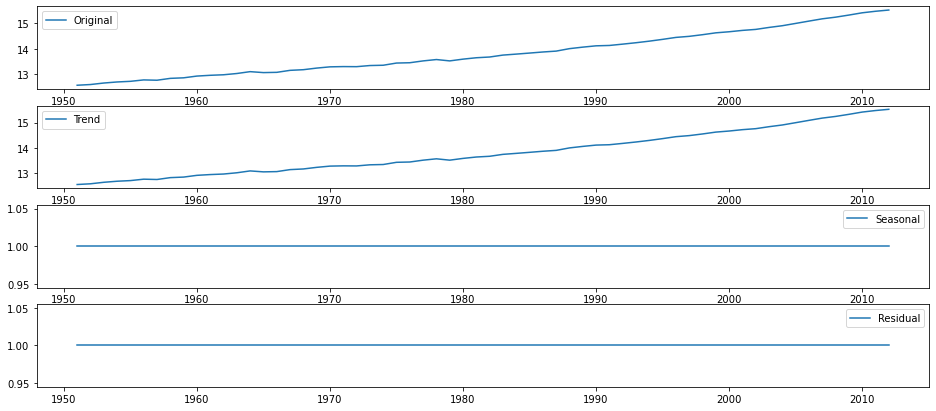

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(X_log, period=1, model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(X_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

## Differencing on basis of log transformation

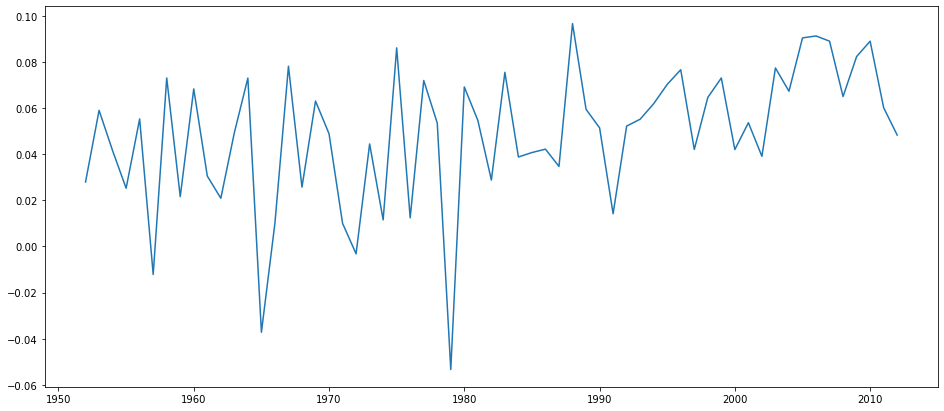

In [39]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
X_log_diff = X_log - X_log.shift(1)
plt.plot(X_log_diff)

In [40]:
adfuller_test2(X_log_diff.dropna())

ADF Test Statistic : 1.0163208142481657
p-value : 0.9944352018000473
#Lags Used : 10
Number of Observations Used : 50
due to weak evidence or lack of evidence against null hypothesis, we fail to reject null hypothesis indicating it is non-staionary


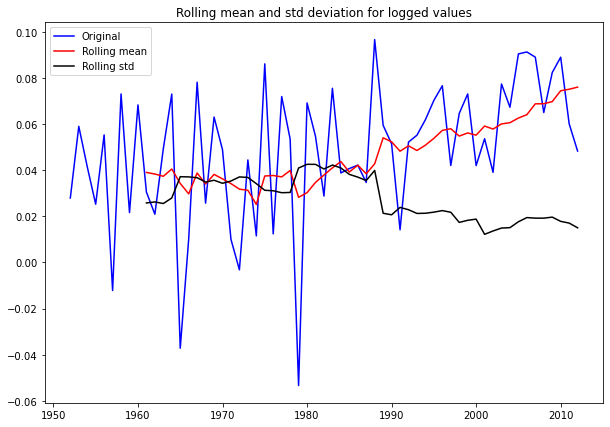

In [41]:
# determining rolling stats for logged data

rollmean1 = X_log_diff.rolling(10).mean()
rollstd1 = X_log_diff.rolling(10).std()

plt.figure(figsize=(10,7))
fig = plt.figure(1)

# plot rolling statistics
original1 = plt.plot(X_log_diff, color='blue', label='Original')
mean1 = plt.plot(rollmean1, color='red', label='Rolling mean')
std1 = plt.plot(rollstd1, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and std deviation for logged values')
plt.show(block=False)

In [42]:
X_log2 = np.log(X_log)
X_log2

,GDP_in_rs_cr
Financial_year,
1951-01-01,2.530856
1952-01-01,2.533081
1953-01-01,2.537762
1954-01-01,2.541043
1955-01-01,2.543034
...,...
2008-01-01,2.723970
2009-01-01,2.729365
2010-01-01,2.735164


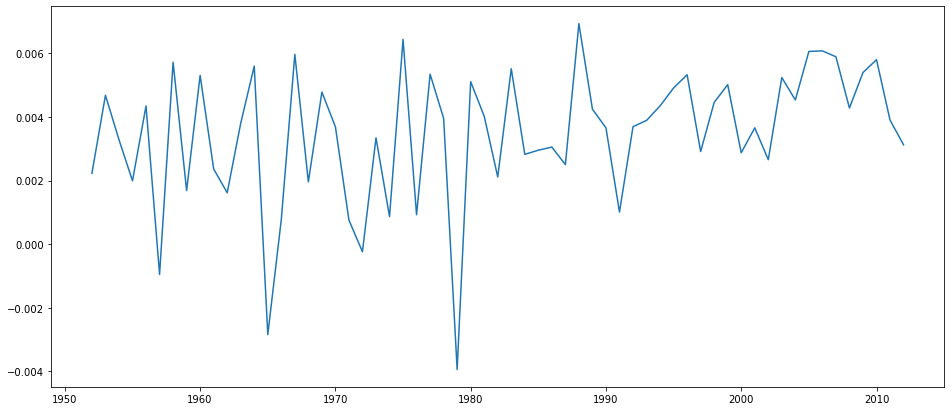

In [43]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
X_log2_diff = X_log2 - X_log2.shift(1)
plt.plot(X_log2_diff)

In [44]:
adfuller_test2(X_log2_diff.dropna())

ADF Test Statistic : 0.6662283963432488
p-value : 0.9891392319130698
#Lags Used : 10
Number of Observations Used : 50
due to weak evidence or lack of evidence against null hypothesis, we fail to reject null hypothesis indicating it is non-staionary


### Auto arima on raw dataset

In [45]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [46]:
model = auto_arima(gdp_sample_df1['GDP_in_rs_cr'], trace=True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1454.968, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1455.310, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1452.391, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1450.425, Time=0.00 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1452.068, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1452.132, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1453.116, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1453.770, Time=0.02 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.254 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   62
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -723.212
Date:                Fri, 23 Sep 2022   AIC                           1450.425
Time:                        16:26:35   BIC                           1454.614
Sample:                             0   HQIC                          1452.063
                                 - 62                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3361      0.094     -3.558      0.000      -0.521      -0.151
sigma2      1.769e+09   7.83e-14   2.26e+22      0.000    1.77e+09    1.77e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):                 0.09
Prob(Q):                              0.49   Prob(JB):                         0.96
Heteroskedasticity (H):               6.42   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [47]:
from statsmodels.tsa.arima_model import ARIMA

In [48]:
model = ARIMA(gdp_sample_df1['GDP_in_rs_cr'], order=(11,2,11))
model_fit = model.fit(disp=0)

In [49]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D2.GDP_in_rs_cr   No. Observations:                   60
Model:               ARIMA(11, 2, 11)   Log Likelihood                -708.359
Method:                       css-mle   S.D. of innovations          26690.398
Date:                Fri, 23 Sep 2022   AIC                           1464.719
Time:                        16:27:55   BIC                           1514.983
Sample:                    01-01-1953   HQIC                          1484.380
                         - 01-01-2012                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4264.2935   5376.102      0.793      0.428   -6272.673    1.48e+04
ar.L1.D2.GDP_in_rs_cr     -0.0413      0.270     -0.153      0.878      -0.570       0.487
ar.L2.D2.GDP_in_rs_cr      0.4016      0.210      1.909      0.056      -0.011       0.814
ar.L3.D2.GDP_in_rs_cr      0.0067      0.210      0.032      0.975      -0.405       0.418
ar.L4.D2.GDP_in_rs_cr      0.2614      0.224      1.164      0.244      -0.179       0.701
ar.L5.D2.GDP_in_rs_cr     -0.2558      0.205     -1.247      0.212      -0.658       0.146
ar.L6.D2.GDP_in_rs_cr      0.1576      0.251      0.628      0.530      -0.334       0.649
ar.L7.D2.GDP_in_rs_cr      0.1953      0.230      0.849      0.396      -0.256       0.646
ar.L8.D2.GDP_in_rs_cr     -0.2824      0.235     -1.200      0.230      -0.744       0.179
ar.L9.D2.GDP_in_rs_cr      0.0109      0.214      0.051      0.960      -0.409       0.431
ar.L10.D2.GDP_in_rs_cr    -0.0420      0.251     -0.167      0.867      -0.534       0.450
ar.L11.D2.GDP_in_rs_cr     0.2475      0.250      0.992      0.321      -0.242       0.737
ma.L1.D2.GDP_in_rs_cr     -0.3400      0.299     -1.138      0.255      -0.926       0.246
ma.L2.D2.GDP_in_rs_cr     -0.5181      0.315     -1.647      0.099      -1.135       0.098
ma.L3.D2.GDP_in_rs_cr      0.4735      0.315      1.502      0.133      -0.144       1.091
ma.L4.D2.GDP_in_rs_cr     -0.5388      0.222     -2.431      0.015      -0.973      -0.104
ma.L5.D2.GDP_in_rs_cr      0.3439      0.313      1.099      0.272      -0.270       0.958
ma.L6.D2.GDP_in_rs_cr     -0.2212      0.389     -0.569      0.569      -0.983       0.541
ma.L7.D2.GDP_in_rs_cr     -0.1334      0.369     -0.361      0.718      -0.857       0.590
ma.L8.D2.GDP_in_rs_cr      0.3642      0.331      1.101      0.271      -0.284       1.013
ma.L9.D2.GDP_in_rs_cr     -0.8113      0.251     -3.230      0.001      -1.304      -0.319
ma.L10.D2.GDP_in_rs_cr     0.1859      0.266      0.698      0.485      -0.336       0.708
ma.L11.D2.GDP_in_rs_cr     0.7392      0.265      2.789      0.005       0.220       1.259
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0833           -0.0000j            1.0833           -0.0000
AR.2             1.0473           -0.5314j            1.1744           -0.0747
AR.3             1.0473           +0.5314j            1.1744            0.0747
AR.4             0.5216           -1.0036j            1.1311           -0.1737
AR.5             0.5216           +1.0036j            1.1311            0.1737
AR.6            -0.9875           -0.2105j            1.0097           -0.4666
AR.7            -0.9875           +0.2105j            1.0097            0.4666
AR.8  

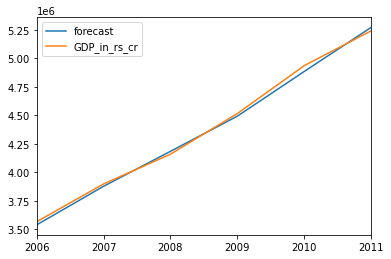

In [50]:
gdp_sample_df1['forecast'] = model_fit.plot_predict(start=55, end=60, dynamic=False)
#gdp_sample_df1[['GDP_in_rs_cr','forecast']].plot(figsize=(16,7))

In [50]:
# gdp_sample_df1 = gdp_sample_df1.drop(['forecast'], axis=1)

### Auto arima on logged dataset

In [51]:
model_log = auto_arima(X_log, trace=True)

model_log.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-246.401, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-204.862, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-226.067, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-247.870, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-248.862, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-247.943, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-252.551, Time=0.15 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-249.821, Time=0.06 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-250.558, Time=0.24 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-250.684, Time=0.23 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-244.922, Time=0.22 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-252.262, Time=0.23 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0]          
Total fit time: 1.486 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   62
Model:               SARIMAX(1, 2, 2)   Log Likelihood                 130.276
Date:                Thu, 22 Sep 2022   AIC                           -252.551
Time:                        03:54:16   BIC                           -244.174
Sample:                             0   HQIC                          -249.275
                                 - 62                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5507      0.264      2.085      0.037       0.033       1.069
ma.L1         -1.7873      0.234     -7.643      0.000      -2.246      -1.329
ma.L2          0.8648      0.231      3.739      0.000       0.411       1.318
sigma2         0.0007      0.000      4.730      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 5.52
Prob(Q):                              0.74   Prob(JB):                         0.06
Heteroskedasticity (H):               0.57   Skew:                            -0.70
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
model_log = ARIMA(gdp_sample_df1['GDP_in_rs_cr'], order=(1,2,2))
model_log_fit = model_log.fit()

In [53]:
model_log_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D2.GDP_in_rs_cr   No. Observations:                   60
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -720.596
Method:                       css-mle   S.D. of innovations          39686.096
Date:                Thu, 22 Sep 2022   AIC                           1451.192
Time:                        03:54:16   BIC                           1461.664
Sample:                    01-01-1953   HQIC                          1455.288
                         - 01-01-2012                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4978.7061   2640.810      1.885      0.059    -197.186    1.02e+04
ar.L1.D2.GDP_in_rs_cr    -0.5581      1.488     -0.375      0.708      -3.475       2.359
ma.L1.D2.GDP_in_rs_cr     0.1010      1.456      0.069      0.945      -2.753       2.955
ma.L2.D2.GDP_in_rs_cr    -0.3154      0.668     -0.472      0.637      -1.624       0.993
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7919           +0.0000j            1.7919            0.5000
MA.1           -1.6279           +0.0000j            1.6279            0.5000
MA.2            1.9480           +0.0000j            1.9480            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Financial_year'>

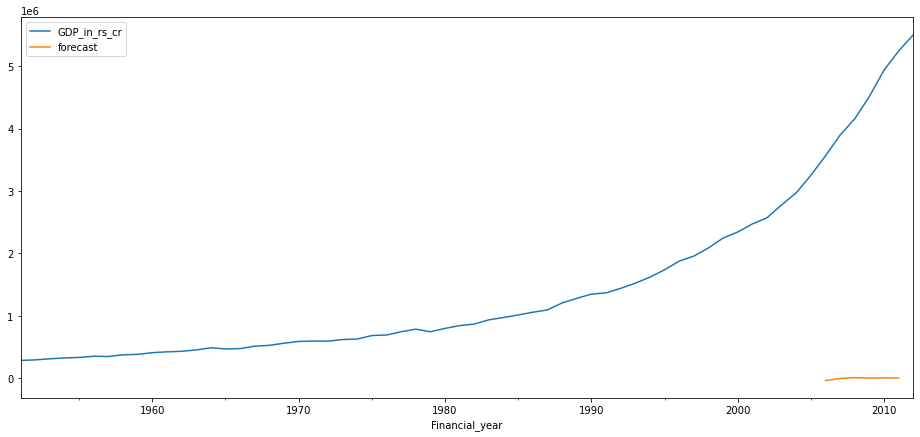

In [54]:
gdp_sample_df1['forecast'] = model_log_fit.predict(start=55, end=60, dynamic=True)
gdp_sample_df1[['GDP_in_rs_cr','forecast']].plot(figsize=(16,7))

### Auto arima on raw second order numpy difference

In [55]:
model_numpy = auto_arima(gdp_sample_df1['gdp recursive order2 difference'].dropna(), trace=True)

model_numpy.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1452.815, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1456.729, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1450.844, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1449.674, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1455.277, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1451.992, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1452.855, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1448.263, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1450.242, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1450.547, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1450.067, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1451.944, Time=0.04 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.323 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -722.131
Date:                Thu, 22 Sep 2022   AIC                           1448.263
Time:                        03:54:17   BIC                           1452.451
Sample:                             0   HQIC                          1449.901
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4065      0.092     -4.402      0.000      -0.587      -0.226
sigma2      1.769e+09   4.16e-12   4.25e+20      0.000    1.77e+09    1.77e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.62   Prob(JB):                         0.93
Heteroskedasticity (H):              10.44   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [56]:
model_numpy = ARIMA(gdp_sample_df1['GDP_in_rs_cr'], order=(0,0,1))
model_numpy_fit = model_numpy.fit()

In [57]:
model_numpy_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           GDP_in_rs_cr   No. Observations:                   62
Model:                     ARMA(0, 1)   Log Likelihood                -924.331
Method:                       css-mle   S.D. of innovations         698178.878
Date:                Thu, 22 Sep 2022   AIC                           1854.661
Time:                        03:54:17   BIC                           1861.043
Sample:                    01-01-1951   HQIC                          1857.167
                         - 01-01-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.451e+06   1.76e+05      8.242      0.000    1.11e+06     1.8e+06
ma.L1.GDP_in_rs_cr     1.0000      0.041     24.114      0.000       0.919       1.081
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Financial_year'>

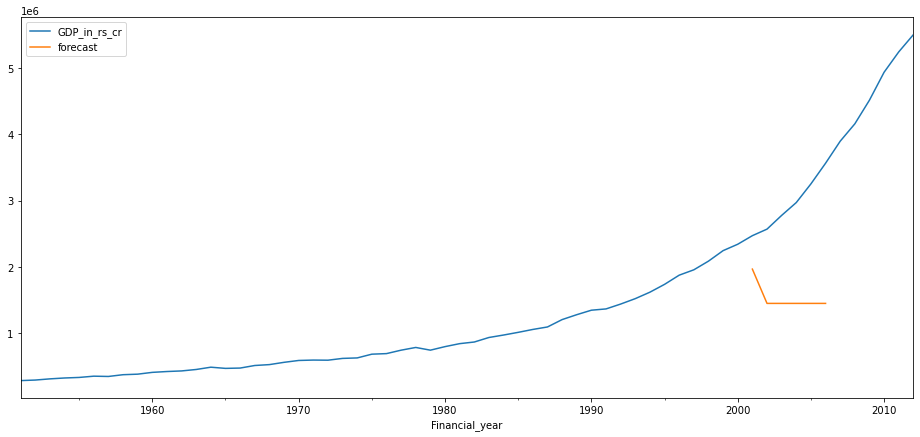

In [58]:
gdp_sample_df1['forecast'] = model_numpy_fit.plot_predict(start=50, end=55, dynamic=False)
gdp_sample_df1[['GDP_in_rs_cr','forecast']].plot(figsize=(16,7))
#result.plot_predict(start=10,end=50,dynamic=False);

### Manual method in which "gdp_sample_df1['gdp recursive order2 difference']" was calculated above.

### This is what our data should look like after removing stationarity using differencing, any kind of trend gets eliminated.

<AxesSubplot:xlabel='Financial_year'>

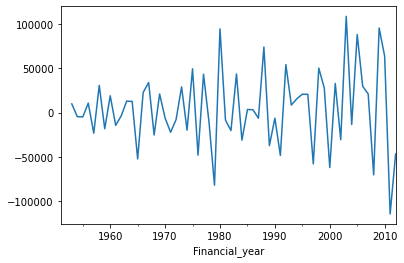

In [59]:
gdp_sample_df1['gdp recursive order2 difference'].plot()

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

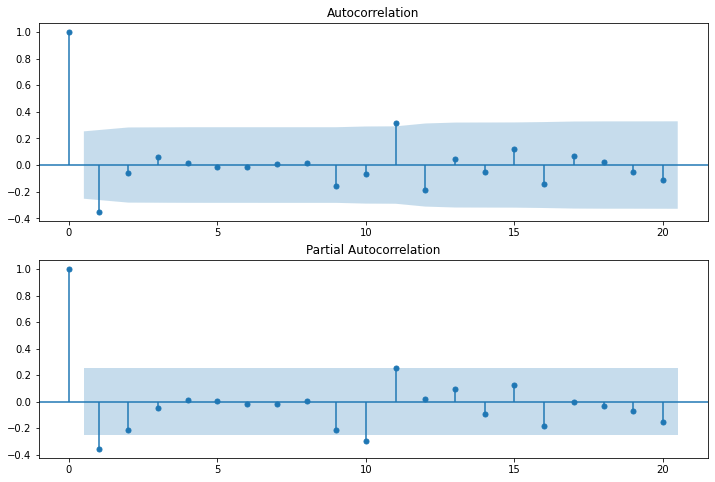

In [61]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(gdp_sample_df1['gdp recursive order2 difference'].dropna(), lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(gdp_sample_df1['gdp recursive order2 difference'].dropna(), lags=20, ax=ax2)

# AR should consider pacf
# MA should consider acf

In [62]:
model_numpy_manual = ARIMA(gdp_sample_df1['GDP_in_rs_cr'], order=(1,2,1))
model_numpy_manual_fit = model_numpy_manual.fit(disp=0)

In [63]:
model_numpy_manual_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D2.GDP_in_rs_cr   No. Observations:                   60
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -720.692
Method:                       css-mle   S.D. of innovations          39750.869
Date:                Thu, 22 Sep 2022   AIC                           1449.383
Time:                        03:54:18   BIC                           1457.761
Sample:                    01-01-1953   HQIC                          1452.660
                         - 01-01-2012                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4967.4234   2673.667      1.858      0.063    -272.868    1.02e+04
ar.L1.D2.GDP_in_rs_cr     0.0320      0.246      0.130      0.897      -0.451       0.515
ma.L1.D2.GDP_in_rs_cr    -0.5060      0.206     -2.455      0.014      -0.910      -0.102
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           31.2761           +0.0000j           31.2761            0.0000
MA.1            1.9762           +0.0000j            1.9762            0.0000
-----------------------------------------------------------------------------
"""

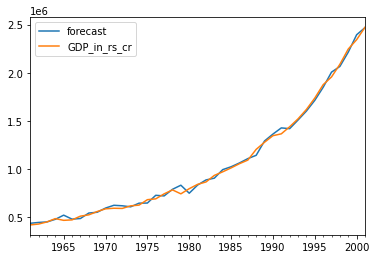

In [64]:
# gdp_sample_df1['forecast'] = model_numpy_manual_fit.predict(start=10, end=55, dynamic=False)
# gdp_sample_df1[['GDP_in_rs_cr','forecast']].plot(figsize=(16,7))

model_numpy_manual_fit.plot_predict(start=10,end=50,dynamic=False);

# Proper method

In [65]:
def adfuller_test2(x):
    result = adfuller(x)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <=0.05:
        print('strong evidence against null hypothesis, we will reject null hypothesis indicating it is stationary')
    else:
        print('due to weak evidence or lack of evidence against null hypothesis, we fail to reject null hypothesis indicating it is non-staionary')

In [66]:
adfuller_test2(gdp_sample_df1['GDP_in_rs_cr'])

ADF Test Statistic : 1.5552297745511696
p-value : 0.9977168474627248
#Lags Used : 11
Number of Observations Used : 50
due to weak evidence or lack of evidence against null hypothesis, we fail to reject null hypothesis indicating it is non-staionary


### Here we make use of ndiffs package

In [67]:
from pmdarima.arima.utils import ndiffs

In [68]:
ndiffs(gdp_sample_df1['GDP_in_rs_cr'], test='adf')

2

#### So our Differencing(d) which is I is 2

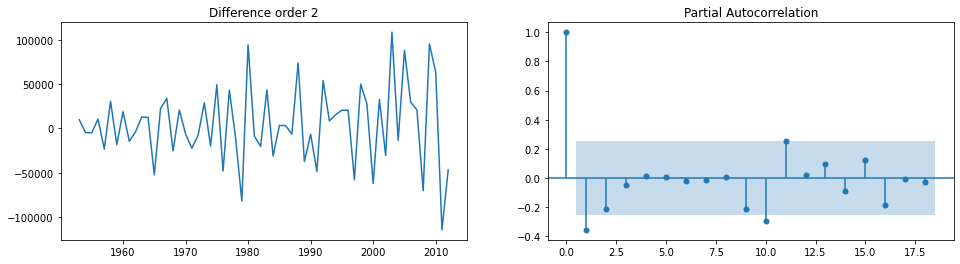

In [69]:
# To find AR(p) value we see the first instance which crosses threshold whether it is in negative

diff = gdp_sample_df1['GDP_in_rs_cr'].diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title('Difference order 2')
#ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2);

#### So our p which is AR is 1

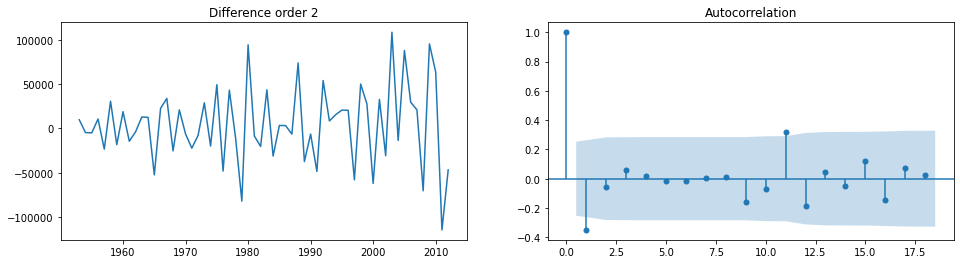

In [70]:
# To find MA(q) value same as AR step

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title('Difference order 2')
#ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

#### So our q which is MA is 1

In [71]:
model_df = ARIMA(gdp_sample_df1['GDP_in_rs_cr'], order=(1,2,1)) #11,2,11 is also valid
result = model_df.fit(disp=0)

In [72]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.GDP_in_rs_cr   No. Observations:                   60
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -720.692
Method:                       css-mle   S.D. of innovations          39750.869
Date:                Thu, 22 Sep 2022   AIC                           1449.383
Time:                        03:54:19   BIC                           1457.761
Sample:                    01-01-1953   HQIC                          1452.660
                         - 01-01-2012                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4967.4234   2673.667      1.858      0.063    -272.868    1.02e+04
ar.L1.D2.GDP_in_rs_cr     0.0320      0.246      0.130      0.897      -0.451       0.515
ma.L1.D2

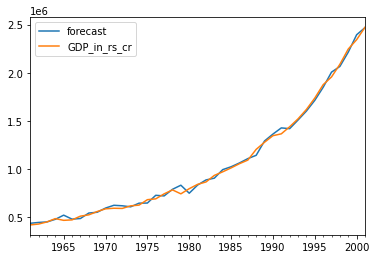

In [73]:
result.plot_predict(start=10,end=50,dynamic=False);

## Now to predict into future

In [74]:
# gdp_sample_df1 = gdp_sample_df1.drop(['gdp recursive order2 difference', 'forecast'], axis=1)

In [75]:
gdp_sample_df1.describe()

,GDP_in_rs_cr,gdp recursive order2 difference,forecast
count,6.200000e+01,60.000000,6.000000e+00
mean,1.450517e+06,4196.233333,1.536697e+06
std,1.350644e+06,44158.449143,2.110957e+05
min,2.861470e+05,-114359.000000,1.450517e+06
25%,4.946502e+05,-20741.250000,1.450517e+06
50%,8.557590e+05,3329.500000,1.450517e+06
75%,1.936854e+06,29115.750000,1.450517e+06
max,5.503476e+06,108485.000000,1.967594e+06


In [94]:
step = 2

fc, se, conf = result.forecast(step)

In [95]:
fc,conf

(array([5810288.32289261, 6123409.37952612]),
 array([[5732378.05077101, 5888198.5950142 ],
        [5981268.62443446, 6265550.13461777]]))

In [96]:
fc = pd.Series(fc, index=test[:step].index)
lower = pd.Series(conf[:,0], index=test[:step].index)
upper = pd.Series(conf[:,1], index=test[:step].index)
fc

Financial_year
2000-01-01    5.810288e+06
2001-01-01    6.123409e+06
dtype: float64

## Here graph is off due to some mistakes in plotting but thats been corrected in GDP main file

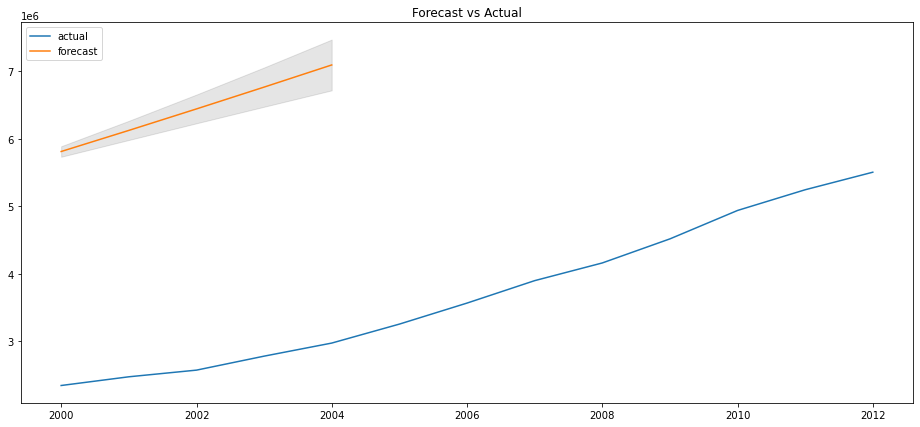

In [81]:
plt.figure(figsize=(16,7))
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.fill_between(lower.index, lower, upper, color='k', alpha=0.1)
plt.title('Forecast vs Actual')
plt.legend(loc='upper left')